In [1]:
import pandas as pd
import numpy as np
import re, os, math, copy

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline


2.6.0


In [2]:
df_pca = pd.read_csv('gray_scott.csv')
# print(df_pca.head())
feature_cols_pcs = [str(i) for i in range(0,13)]
label_pca='walltime'
X_pca = df_pca[feature_cols_pcs] # Features
y_pca = df_pca[label_pca] # Target variable

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=1) 

linear_regress_pca = LinearRegression()
linear_regress_pca.fit(X_train_pca,y_train_pca)
y_pred_pca = linear_regress_pca.predict(X_test_pca)

res_val_pca = []
for p, a in zip(y_pred_pca, y_test_pca):
    res_val_pca.append([p, a])
res_pca = pd.DataFrame(res_val_pca, columns=["predic", "actual"])
print(res_pca.head())
print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca))



      predic      actual
0  10.678091    4.539089
1  71.194316  454.495120
2  68.201857   94.412598
3 -17.130789    0.375797
4  98.632505   88.072707
Mean Squared Error: 969.9600259448212
Mean Absolute Error: 19.073892495207705


In [3]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca
# NN Model with one dimention
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae'])
history = model.fit(X_train_pca, y_train_pca, epochs=300, validation_split=0.2, batch_size=20)


Epoch 1/300
220/220 [==============================] - 1s 1ms/step - loss: 747.0108 - mse: 747.0108 - mae: 14.4663 - val_loss: 673.2760 - val_mse: 673.2760 - val_mae: 11.3174
Epoch 2/300
220/220 [==============================] - 0s 923us/step - loss: 370.6231 - mse: 370.6231 - mae: 9.4913 - val_loss: 398.9055 - val_mse: 398.9055 - val_mae: 9.8739
Epoch 3/300
220/220 [==============================] - 0s 884us/step - loss: 301.1236 - mse: 301.1236 - mae: 8.7020 - val_loss: 306.7479 - val_mse: 306.7479 - val_mae: 8.9957
Epoch 4/300
220/220 [==============================] - 0s 914us/step - loss: 232.1999 - mse: 232.1999 - mae: 8.0349 - val_loss: 264.7262 - val_mse: 264.7262 - val_mae: 9.2586
Epoch 5/300
220/220 [==============================] - 0s 897us/step - loss: 176.2305 - mse: 176.2305 - mae: 7.1949 - val_loss: 199.6958 - val_mse: 199.6958 - val_mae: 7.4286
Epoch 6/300
220/220 [==============================] - 0s 898us/step - loss: 168.0656 - mse: 168.0656 - mae: 6.9086 - val_los

Epoch 48/300
220/220 [==============================] - 0s 892us/step - loss: 89.5471 - mse: 89.5471 - mae: 5.0480 - val_loss: 112.0930 - val_mse: 112.0930 - val_mae: 5.7510
Epoch 49/300
220/220 [==============================] - 0s 894us/step - loss: 90.6312 - mse: 90.6312 - mae: 4.9984 - val_loss: 104.6789 - val_mse: 104.6789 - val_mae: 5.4943
Epoch 50/300
220/220 [==============================] - 0s 879us/step - loss: 81.4997 - mse: 81.4997 - mae: 4.7552 - val_loss: 106.4251 - val_mse: 106.4251 - val_mae: 5.4824
Epoch 51/300
220/220 [==============================] - 0s 874us/step - loss: 78.0369 - mse: 78.0369 - mae: 4.6202 - val_loss: 124.7375 - val_mse: 124.7375 - val_mae: 5.8598
Epoch 52/300
220/220 [==============================] - 0s 880us/step - loss: 78.1768 - mse: 78.1768 - mae: 4.5872 - val_loss: 105.4405 - val_mse: 105.4405 - val_mae: 5.5231
Epoch 53/300
220/220 [==============================] - 0s 1ms/step - loss: 87.0588 - mse: 87.0588 - mae: 4.9530 - val_loss: 119.0

220/220 [==============================] - 0s 925us/step - loss: 70.2652 - mse: 70.2652 - mae: 4.2689 - val_loss: 104.8049 - val_mse: 104.8049 - val_mae: 5.4653
Epoch 96/300
220/220 [==============================] - 0s 902us/step - loss: 67.3229 - mse: 67.3229 - mae: 4.2120 - val_loss: 96.9790 - val_mse: 96.9790 - val_mae: 5.2541
Epoch 97/300
220/220 [==============================] - 0s 921us/step - loss: 71.1839 - mse: 71.1839 - mae: 4.3342 - val_loss: 101.0302 - val_mse: 101.0302 - val_mae: 5.3329
Epoch 98/300
220/220 [==============================] - 0s 934us/step - loss: 67.2629 - mse: 67.2629 - mae: 4.1972 - val_loss: 104.5108 - val_mse: 104.5108 - val_mae: 5.2929
Epoch 99/300
220/220 [==============================] - 0s 894us/step - loss: 64.2773 - mse: 64.2773 - mae: 4.0213 - val_loss: 111.4924 - val_mse: 111.4924 - val_mae: 5.8558
Epoch 100/300
220/220 [==============================] - 0s 900us/step - loss: 72.9757 - mse: 72.9757 - mae: 4.4047 - val_loss: 109.5961 - val_ms

220/220 [==============================] - 0s 897us/step - loss: 67.7072 - mse: 67.7072 - mae: 4.0517 - val_loss: 103.4055 - val_mse: 103.4055 - val_mae: 5.1013
Epoch 143/300
220/220 [==============================] - 0s 900us/step - loss: 62.6785 - mse: 62.6785 - mae: 3.9747 - val_loss: 105.0707 - val_mse: 105.0707 - val_mae: 5.1948
Epoch 144/300
220/220 [==============================] - 0s 930us/step - loss: 58.3616 - mse: 58.3616 - mae: 3.7567 - val_loss: 92.1584 - val_mse: 92.1584 - val_mae: 4.8128
Epoch 145/300
220/220 [==============================] - 0s 928us/step - loss: 56.7128 - mse: 56.7128 - mae: 3.6822 - val_loss: 95.0008 - val_mse: 95.0009 - val_mae: 4.9145
Epoch 146/300
220/220 [==============================] - 0s 890us/step - loss: 58.3402 - mse: 58.3402 - mae: 3.7401 - val_loss: 98.4706 - val_mse: 98.4706 - val_mae: 4.9866
Epoch 147/300
220/220 [==============================] - 0s 889us/step - loss: 57.2746 - mse: 57.2746 - mae: 3.6985 - val_loss: 96.5644 - val_mse

220/220 [==============================] - 0s 929us/step - loss: 55.7600 - mse: 55.7600 - mae: 3.5760 - val_loss: 99.6256 - val_mse: 99.6256 - val_mae: 4.8670
Epoch 190/300
220/220 [==============================] - 0s 917us/step - loss: 58.2657 - mse: 58.2657 - mae: 3.6544 - val_loss: 109.8471 - val_mse: 109.8471 - val_mae: 5.2064
Epoch 191/300
220/220 [==============================] - 0s 893us/step - loss: 62.2992 - mse: 62.2992 - mae: 3.8568 - val_loss: 90.4533 - val_mse: 90.4533 - val_mae: 4.6659
Epoch 192/300
220/220 [==============================] - 0s 946us/step - loss: 54.4172 - mse: 54.4172 - mae: 3.4753 - val_loss: 98.1044 - val_mse: 98.1044 - val_mae: 4.7309
Epoch 193/300
220/220 [==============================] - 0s 909us/step - loss: 49.9301 - mse: 49.9301 - mae: 3.2675 - val_loss: 115.8874 - val_mse: 115.8874 - val_mae: 4.9953
Epoch 194/300
220/220 [==============================] - 0s 909us/step - loss: 52.9531 - mse: 52.9531 - mae: 3.4461 - val_loss: 90.3804 - val_mse

220/220 [==============================] - 0s 950us/step - loss: 52.7053 - mse: 52.7053 - mae: 3.3575 - val_loss: 87.7119 - val_mse: 87.7119 - val_mae: 4.7219
Epoch 237/300
220/220 [==============================] - 0s 915us/step - loss: 51.2057 - mse: 51.2057 - mae: 3.2866 - val_loss: 88.3715 - val_mse: 88.3715 - val_mae: 4.6268
Epoch 238/300
220/220 [==============================] - 0s 915us/step - loss: 48.6780 - mse: 48.6780 - mae: 3.2232 - val_loss: 92.3312 - val_mse: 92.3312 - val_mae: 4.6281
Epoch 239/300
220/220 [==============================] - 0s 901us/step - loss: 50.3799 - mse: 50.3800 - mae: 3.3329 - val_loss: 89.0295 - val_mse: 89.0295 - val_mae: 4.7961
Epoch 240/300
220/220 [==============================] - 0s 918us/step - loss: 53.3292 - mse: 53.3292 - mae: 3.4858 - val_loss: 96.1751 - val_mse: 96.1751 - val_mae: 4.7981
Epoch 241/300
220/220 [==============================] - 0s 905us/step - loss: 52.1390 - mse: 52.1390 - mae: 3.4430 - val_loss: 93.6930 - val_mse: 93

220/220 [==============================] - 0s 863us/step - loss: 48.4265 - mse: 48.4265 - mae: 3.2303 - val_loss: 90.9260 - val_mse: 90.9260 - val_mae: 4.7301
Epoch 284/300
220/220 [==============================] - 0s 839us/step - loss: 48.5548 - mse: 48.5548 - mae: 3.2476 - val_loss: 89.2732 - val_mse: 89.2732 - val_mae: 4.5944
Epoch 285/300
220/220 [==============================] - 0s 841us/step - loss: 53.1443 - mse: 53.1443 - mae: 3.3355 - val_loss: 94.2415 - val_mse: 94.2415 - val_mae: 4.8851
Epoch 286/300
220/220 [==============================] - 0s 842us/step - loss: 51.1885 - mse: 51.1885 - mae: 3.3564 - val_loss: 95.0373 - val_mse: 95.0373 - val_mae: 4.8058
Epoch 287/300
220/220 [==============================] - 0s 854us/step - loss: 47.7923 - mse: 47.7923 - mae: 3.1576 - val_loss: 88.9161 - val_mse: 88.9161 - val_mae: 4.6047
Epoch 288/300
220/220 [==============================] - 0s 854us/step - loss: 48.4225 - mse: 48.4225 - mae: 3.1922 - val_loss: 95.2291 - val_mse: 95

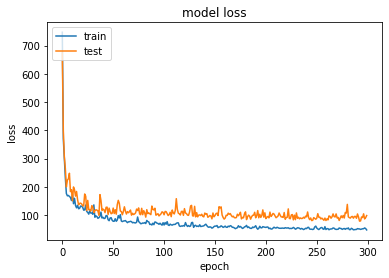

118/118 [==============================] - 0s 557us/step - loss: 76.9931 - mse: 76.9931 - mae: 4.1673
       predic      actual
0    6.833249    4.539089
1  396.818268  454.495120
2   88.858261   94.412598
3    0.912985    0.375797
4   93.378998   88.072707
Mean Squared Error: 76.99314245387222
Mean Absolute Error: 4.167312001228738


In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(X_train_pca, y_train_pca, batch_size=20)
model.evaluate(X_test_pca, y_test_pca, batch_size=20)

y_pred_pca_2 = model.predict(X_test_pca).flatten()
testy_np = y_test_pca.to_numpy()
res_val_pca_2 = []
for p, a in zip(y_pred_pca_2, testy_np):
    res_val_pca_2.append([p, a])
res_pca_2 = pd.DataFrame(res_val_pca_2, columns=["predic", "actual"])
print(res_pca_2.head())

print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca_2))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca_2))

In [5]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train_pca, y_train_pca)

y_pred_pca_3 = regressor.predict(X_test_pca)

res_val_pca_3 = []
for p, a in zip(y_pred_pca_3, y_test_pca):
    res_val_pca_3.append([p, a])
res_val_pca_3 = pd.DataFrame(res_val_pca_3, columns=["predic", "actual"])
print(res_val_pca_3.head())
print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca_3))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca_3))



       predic      actual
0    5.045056    4.539089
1  387.939560  454.495120
2  123.206608   94.412598
3    0.375797    0.375797
4   88.072707   88.072707
Mean Squared Error: 428.2844207975549
Mean Absolute Error: 5.510168407059013
